<a href="https://www.kaggle.com/code/risakashiwabara/eda-matplotlib-scatterplots?scriptVersionId=152729531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install xlrd --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xlrd

In [3]:
df_data = pd.read_csv('/kaggle/input/japandairy-product-consumption-in-japan/_rawmilkthroughput.csv', index_col=0)
df_reset = df_data.reset_index('year')
df_index = df_reset [1:38]
df_columns = df_index.iloc[:,0:14]
df_drop = df_columns.drop('total（month)', axis=1)
df = df_drop.dropna(how='all')


df

,year,1,2,3,4,5,6,7,8,9,10,11,12
1,1986,"10,395","9,945","11,822","13,390","14,215","13,669","14,281","15,367","14,392","14,708","14,785","15,893"
2,1987,"17,447","16,451","17,861","15,260","16,516","16,379","16,283","15,825","15,112","14,629","13,698","13,505"
3,1988,"12,983","11,646","11,805","10,670","11,014","10,761","10,445","9,781","9,527","9,731","9,351","9,492"
4,1989,"9,340","9,178","10,503","10,681","11,050","10,685","10,759","10,312","10,076","10,166","9,903","10,221"
5,1990,"10,256","9,479","10,818","11,222","11,492","11,185","11,022","10,910","10,468","10,612","10,072","10,337"
6,1991,"9,864","9,167","10,471","10,646","10,966","10,459","10,537","10,535","10,182","10,428","10,044","10,286"
7,1992,"9,893","9,514","9,453","9,442","10,120","9,887","9,676","9,803","9,656","9,792","9,417","9,540"
8,1993,"9,398","8,609","9,674","9,852","10,189","9,741","9,809","11,520","9,770","10,506","11,192","12,447"
9,1994,"13,330","13,403","17,457","12,514","12,742","12,562","12,753","12,271","11,814","11,787","11,431","11,950"
10,1995,"11,219","10,102","10,948","11,050","11,628","11,250","11,215","11,309","11,119","11,296","10,759","11,009"


In [4]:
num_features = df.columns[1:14]
df[num_features].describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,36,36,36,36,36,36,36,36,36,36,36
top,"10,395","9,945","11,822","13,390","14,215","13,669","14,281","15,367","14,392","14,708","14,785","15,893"
freq,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
col = ['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.columns=['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1986,"10,395","9,945","11,822","13,390","14,215","13,669","14,281","15,367","14,392","14,708","14,785","15,893"
2,1987,"17,447","16,451","17,861","15,260","16,516","16,379","16,283","15,825","15,112","14,629","13,698","13,505"
3,1988,"12,983","11,646","11,805","10,670","11,014","10,761","10,445","9,781","9,527","9,731","9,351","9,492"
4,1989,"9,340","9,178","10,503","10,681","11,050","10,685","10,759","10,312","10,076","10,166","9,903","10,221"
5,1990,"10,256","9,479","10,818","11,222","11,492","11,185","11,022","10,910","10,468","10,612","10,072","10,337"
6,1991,"9,864","9,167","10,471","10,646","10,966","10,459","10,537","10,535","10,182","10,428","10,044","10,286"
7,1992,"9,893","9,514","9,453","9,442","10,120","9,887","9,676","9,803","9,656","9,792","9,417","9,540"
8,1993,"9,398","8,609","9,674","9,852","10,189","9,741","9,809","11,520","9,770","10,506","11,192","12,447"
9,1994,"13,330","13,403","17,457","12,514","12,742","12,562","12,753","12,271","11,814","11,787","11,431","11,950"
10,1995,"11,219","10,102","10,948","11,050","11,628","11,250","11,215","11,309","11,119","11,296","10,759","11,009"


In [6]:
df['year'] = df['year'].astype(int)
df_=df.replace(",","", regex=True)
df_ = df_.astype('int')
df_.dtypes

year    int64
Jan     int64
Feb     int64
Mar     int64
Apr     int64
May     int64
Jun     int64
Jul     int64
Aug     int64
Sep     int64
Oct     int64
Nov     int64
Dec     int64
dtype: object

Jan


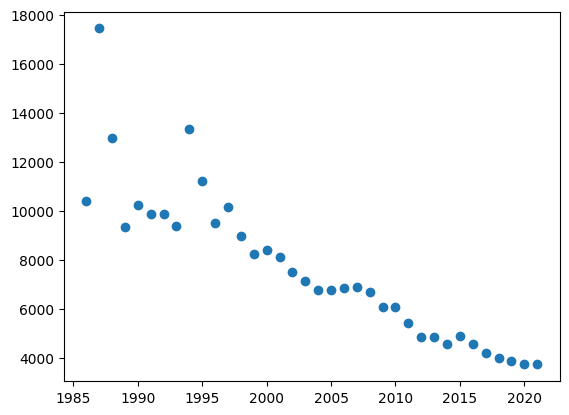

Feb


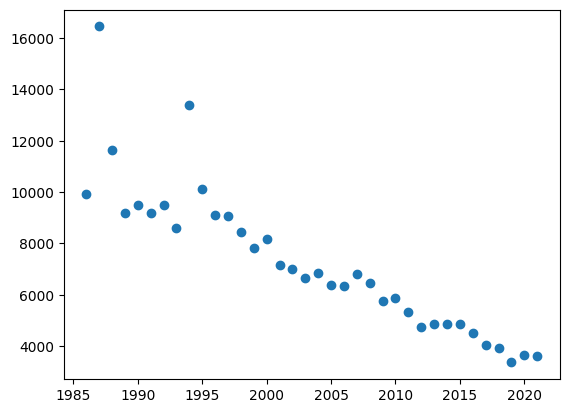

Mar


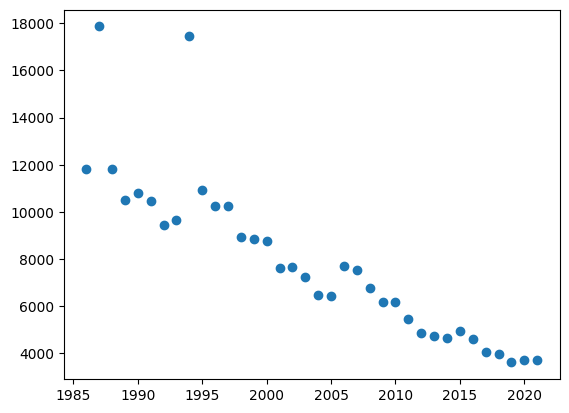

Apr


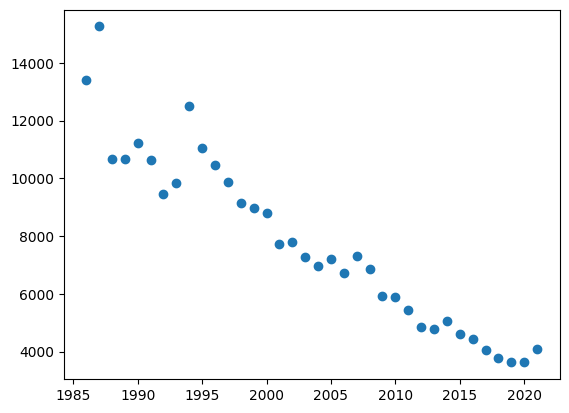

May


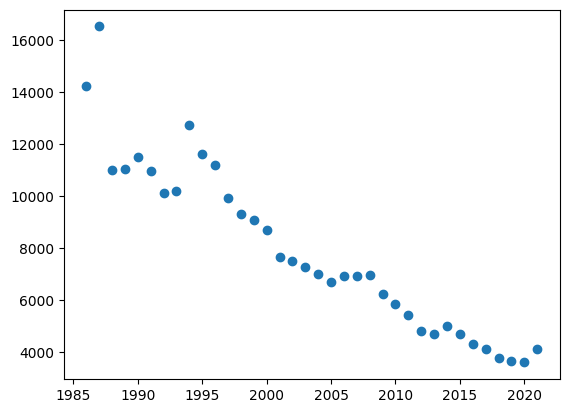

Jun


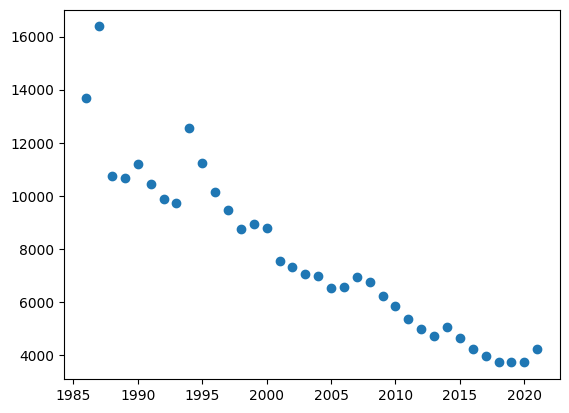

Jul


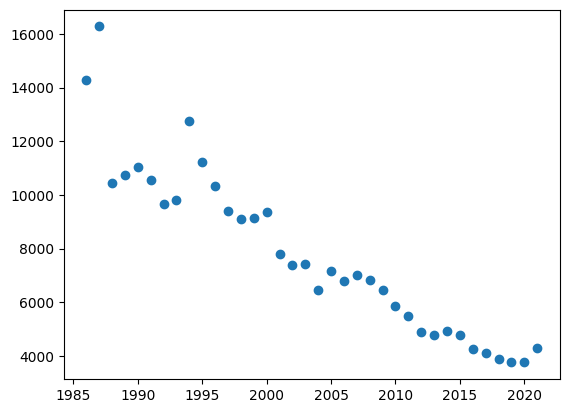

Aug


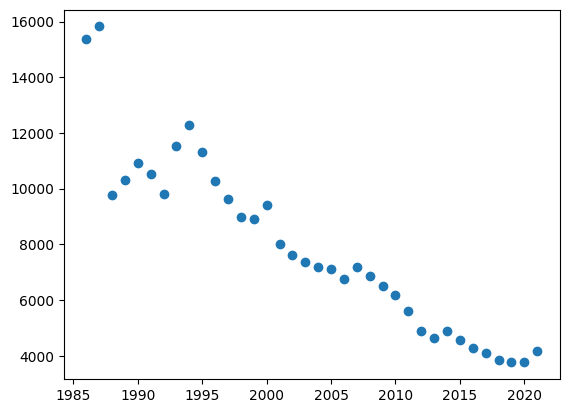

Sep


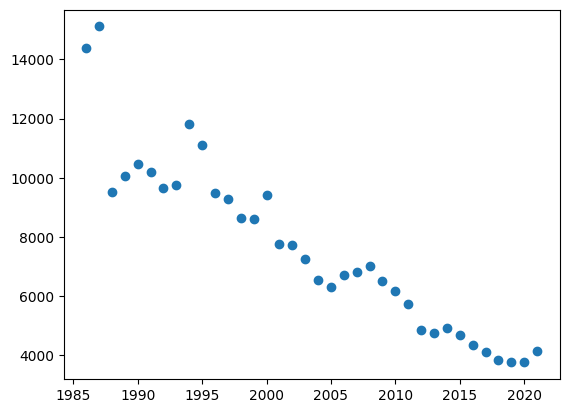

Oct


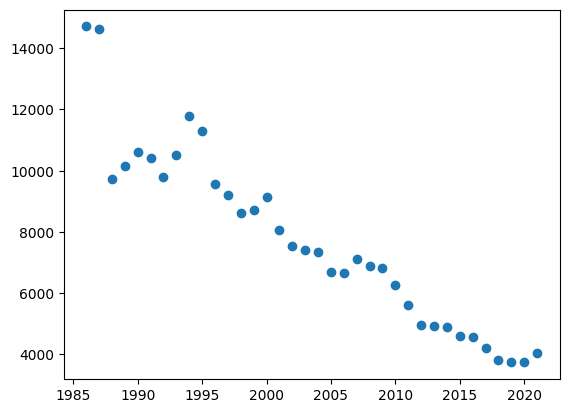

Nov


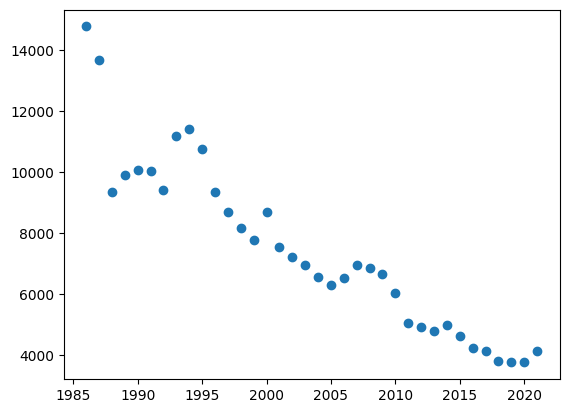

Dec


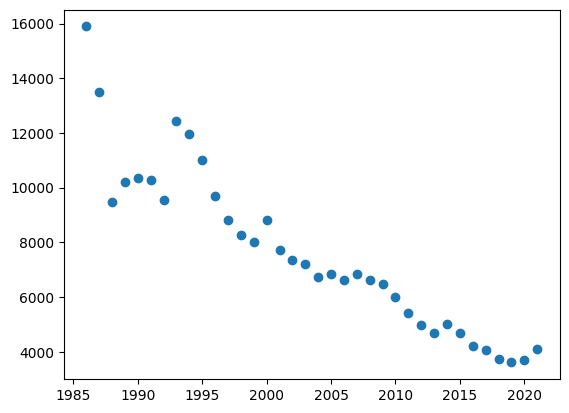

In [7]:
df_number = df_.select_dtypes(include=np.number)
i =  ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for a in i:
    print(a)
    plt.scatter(df_['year'],df_[a])
    plt.show()

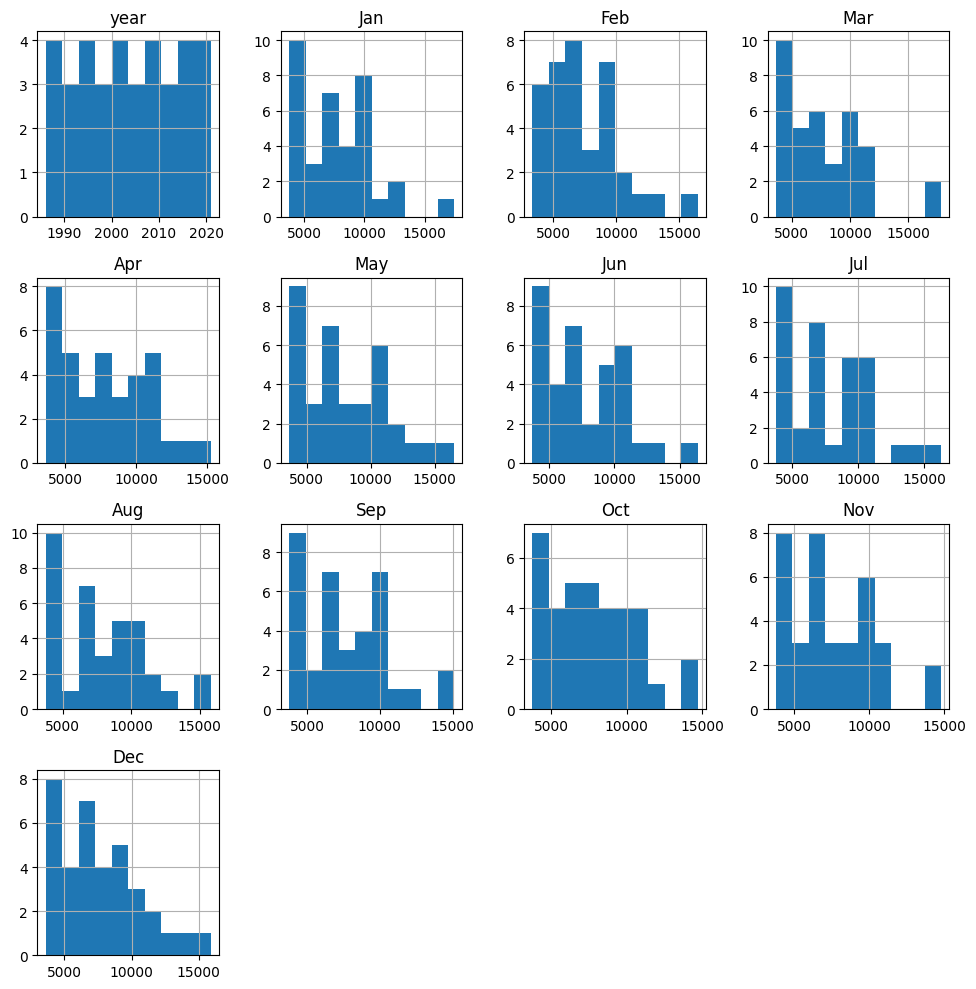

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # グラフが見きれないようにするためサイズを大きくしておく
df_.hist(); # 一括でヒストグラムを描画する
plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示